In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astra.plot.utils import latexify

In [2]:
train_region = 'lucknow'
test_region = 'lucknow'
df = pd.read_excel('VLM_experiments_train_Lucknow_test_lucknow_GMS_images_performance.xlsx')
# df = pd.read_excel('VLM_experiments_train_Lucknow_test_WB_GMS_images_performance.xlsx')
# df = pd.read_excel('VLM_experiments_train_WB_test_WB_GMS_images_performance.xlsx')
# df = pd.read_excel('VLM_experiments_train_WB_test_Lucknow_GMS_images_performance.xlsx')
# df = pd.read_excel('VLM_experiments_Train_Lucknow_test_Lucknow_background_images_performance_GMS.xlsx')
# df = pd.read_excel('VLM_experiments_train_WB_test_WB_background_images_performance_GMS.xlsx')

# change the IoU threshold
df = df.loc[df['IoU'] == 0.5]

In [3]:
df['kiln_images'] = df['Train images'].apply(lambda x: x.split('Non background images\n=')[1].split('( ')[0])

In [4]:
df['train_kiln_instances'] = df['Train images'].apply(lambda x: x.split('( ')[1].split('kilns')[0])

In [5]:
df.columns

Index(['Train images', 'Model', 'IoU', 'Precision', 'Recall', 'F1 score', 'TP',
       'FP', 'FN', 'Kiln instances', 'mAP', 'configuration', 'epochs',
       'parameters', 'kiln_images', 'train_kiln_instances'],
      dtype='object')

In [6]:
for i, row in df.iterrows():
    if row['IoU'] == 0.5:
        print(f"{row['kiln_images']} & {row['Model']} & {round(row['Precision']*100)}\% & {round(row['Recall']*100)}\% & {round(row['F1 score']*100)}\% \\\ \n")

 1  & google/paligemma2-3b-pt-448 & 24\% & 24\% & 24\% \\ 

 1  & microsoft/Florence-2-large-ft & 0\% & 0\% & 0\% \\ 

 1  & Qwen/Qwen2.5-VL-3B-Instruct & 44\% & 44\% & 44\% \\ 

 1  & Qwen/Qwen2.5-VL-7B-Instruct & 21\% & 24\% & 23\% \\ 

 1  & yolo11-obb & 0\% & 0\% & 0\% \\ 

 1  & yoloe & 0\% & 0\% & 0\% \\ 

 2  & google/paligemma2-3b-pt-448 & 24\% & 24\% & 24\% \\ 

 2  & microsoft/Florence-2-large-ft & 0\% & 0\% & 0\% \\ 

 2  & Qwen/Qwen2.5-VL-3B-Instruct & 36\% & 36\% & 36\% \\ 

 2  & Qwen/Qwen2.5-VL-7B-Instruct & 44\% & 44\% & 44\% \\ 

 2  & yolo11-obb & 0\% & 0\% & 0\% \\ 

 2  & yoloe & 0\% & 0\% & 0\% \\ 

 3  & google/paligemma2-3b-pt-448 & 40\% & 40\% & 40\% \\ 

 3  & microsoft/Florence-2-large-ft & 0\% & 0\% & 0\% \\ 

 3  & Qwen/Qwen2.5-VL-3B-Instruct & 48\% & 48\% & 48\% \\ 

 3  & Qwen/Qwen2.5-VL-7B-Instruct & 52\% & 52\% & 52\% \\ 

 3  & yolo11-obb & 0\% & 0\% & 0\% \\ 

 3  & yoloe & 0\% & 0\% & 0\% \\ 

 4  & google/paligemma2-3b-pt-448 & 36\% & 36\% & 36\% \\ 

In [7]:
df.head(5)

,Train images,Model,IoU,Precision,Recall,F1 score,TP,FP,FN,Kiln instances,mAP,configuration,epochs,parameters,kiln_images,train_kiln_instances
2,Images = 1\nNon background images\n= 1 ( 1 kil...,google/paligemma2-3b-pt-448,0.5,0.24,0.24,0.24,6,19,19,25,0.060063,NaN,50.0,11 M,1,1
6,Images = 1\nNon background images\n= 1 ( 1 kil...,microsoft/Florence-2-large-ft,0.5,0.00,0.00,0.00,0,0,25,25,0.000000,NaN,50.0,4 M,1,1
10,Images = 1\nNon background images\n= 1 ( 1 kil...,Qwen/Qwen2.5-VL-3B-Instruct,0.5,0.44,0.44,0.44,11,14,14,25,0.240170,NaN,NaN,NaN,1,1
14,Images = 1\nNon background images\n= 1 ( 1 kil...,Qwen/Qwen2.5-VL-7B-Instruct,0.5,0.21,0.24,0.23,6,22,19,25,0.110000,NaN,NaN,NaN,1,1
18,Images = 1\nNon background images\n= 1 ( 1 kil...,yolo11-obb,0.5,0.00,0.00,0.00,0,0,25,25,0.000000,NaN,NaN,NaN,1,1


#### Precision plot

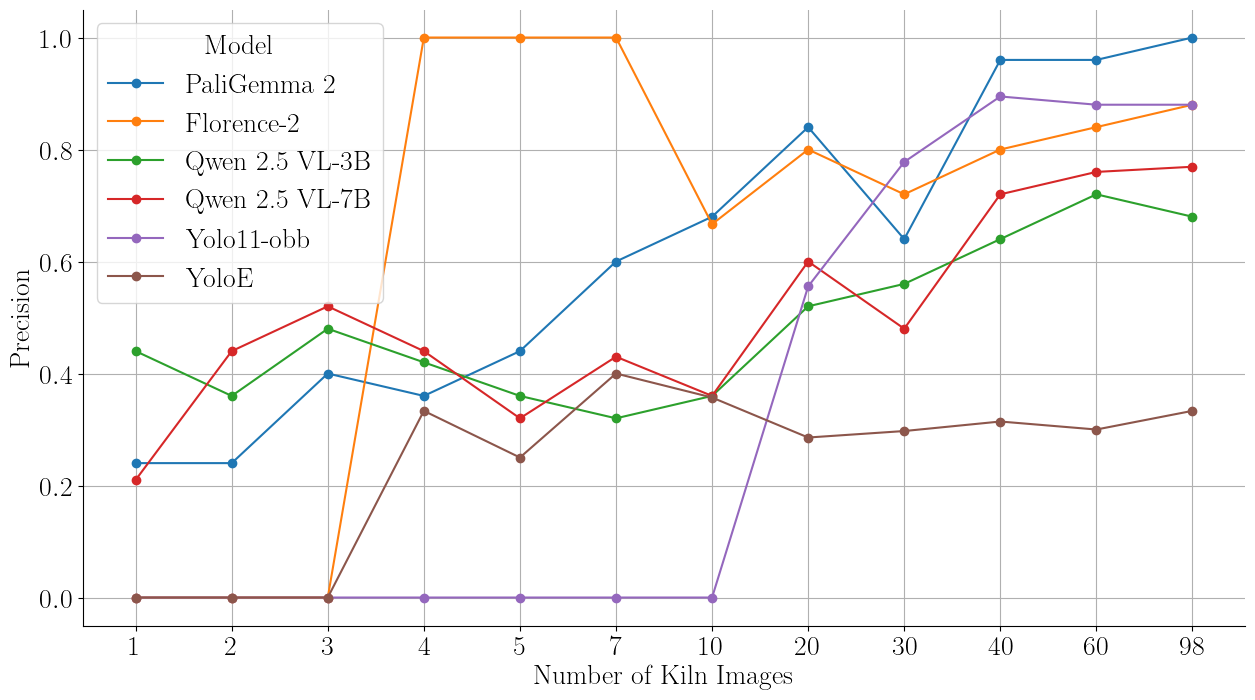

In [11]:
%matplotlib inline
latexify(15,8,20) # paper
fig, ax =plt.subplots()
ax.plot(df.loc[df['Model'] == 'google/paligemma2-3b-pt-448','kiln_images'], df.loc[df['Model'] == 'google/paligemma2-3b-pt-448','Precision'], marker='o', label = 'PaliGemma 2')
ax.plot(df.loc[df['Model'] == 'microsoft/Florence-2-large-ft','kiln_images'], df.loc[df['Model'] == 'microsoft/Florence-2-large-ft','Precision'], marker='o', label = 'Florence-2')
ax.plot(df.loc[df['Model'] == 'Qwen/Qwen2.5-VL-3B-Instruct','kiln_images'], df.loc[df['Model'] == 'Qwen/Qwen2.5-VL-3B-Instruct','Precision'], marker='o', label = 'Qwen 2.5 VL-3B')
ax.plot(df.loc[df['Model'] == 'Qwen/Qwen2.5-VL-7B-Instruct','kiln_images'], df.loc[df['Model'] == 'Qwen/Qwen2.5-VL-7B-Instruct','Precision'], marker='o', label = 'Qwen 2.5 VL-7B')
ax.plot(df.loc[df['Model'] == 'yolo11-obb','kiln_images'], df.loc[df['Model'] == 'yolo11-obb','Precision'], marker='o', label = 'Yolo11-obb')
ax.plot(df.loc[df['Model'] == 'yoloe','kiln_images'], df.loc[df['Model'] == 'yoloe','Precision'], marker='o', label = 'YoloE')

ax.set_xlabel('Number of Kiln Images')
ax.set_ylabel('Precision')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
ax.legend(title='Model')
fig.savefig(f'precision_vs_kiln_images_train_{train_region}_test_{test_region}.png', dpi=300, bbox_inches='tight')

#### Recall plot

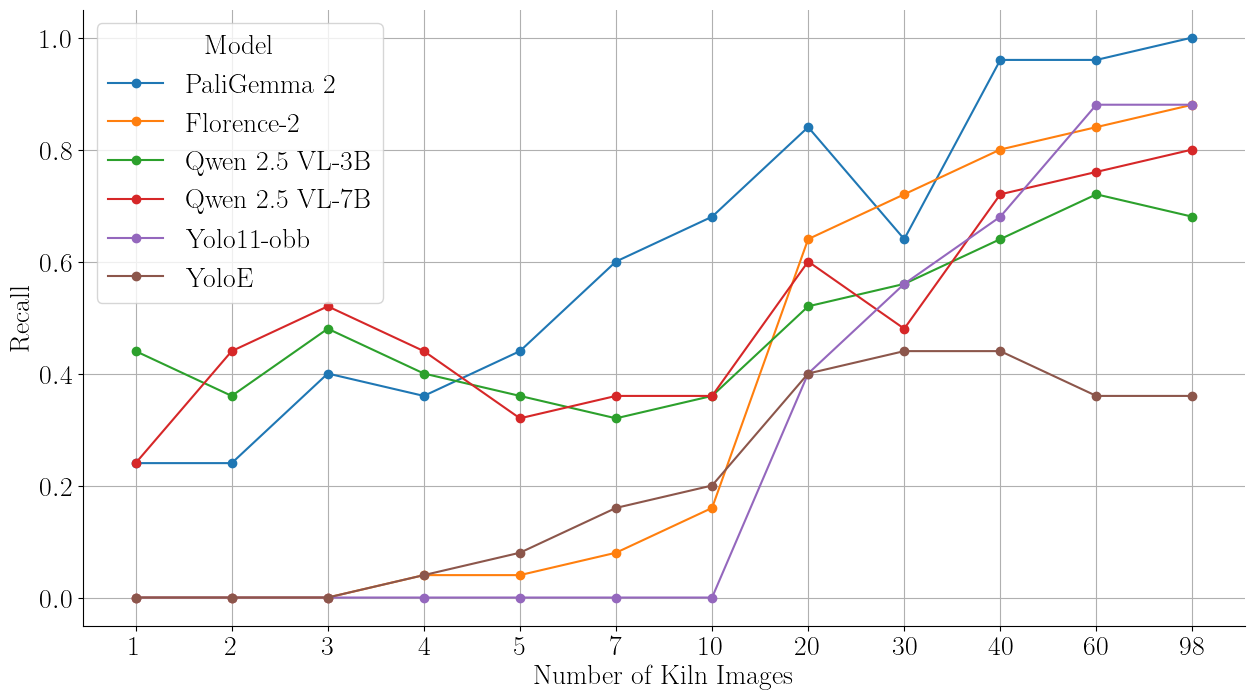

In [12]:
%matplotlib inline
latexify(15,8,20) # paper
fig, ax =plt.subplots()
ax.plot(df.loc[df['Model'] == 'google/paligemma2-3b-pt-448','kiln_images'], df.loc[df['Model'] == 'google/paligemma2-3b-pt-448','Recall'], marker='o', label = 'PaliGemma 2')
ax.plot(df.loc[df['Model'] == 'microsoft/Florence-2-large-ft','kiln_images'], df.loc[df['Model'] == 'microsoft/Florence-2-large-ft','Recall'], marker='o', label = 'Florence-2')
ax.plot(df.loc[df['Model'] == 'Qwen/Qwen2.5-VL-3B-Instruct','kiln_images'], df.loc[df['Model'] == 'Qwen/Qwen2.5-VL-3B-Instruct','Recall'], marker='o', label = 'Qwen 2.5 VL-3B')
ax.plot(df.loc[df['Model'] == 'Qwen/Qwen2.5-VL-7B-Instruct','kiln_images'], df.loc[df['Model'] == 'Qwen/Qwen2.5-VL-7B-Instruct','Recall'], marker='o', label = 'Qwen 2.5 VL-7B')
ax.plot(df.loc[df['Model'] == 'yolo11-obb','kiln_images'], df.loc[df['Model'] == 'yolo11-obb','Recall'], marker='o', label = 'Yolo11-obb')
ax.plot(df.loc[df['Model'] == 'yoloe','kiln_images'], df.loc[df['Model'] == 'yoloe','Recall'], marker='o', label = 'YoloE')


ax.set_xlabel('Number of Kiln Images')
ax.set_ylabel('Recall')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
ax.legend(title='Model')
fig.savefig(f'Recall_vs_kiln_images_train_{train_region}_test_{test_region}.png', dpi=300, bbox_inches='tight')

#### F1-score plot

In [13]:
f'F1_score_vs_kiln_images_train_{train_region}_test_{test_region}.png'

'F1_score_vs_kiln_images_train_lucknow_test_lucknow.png'

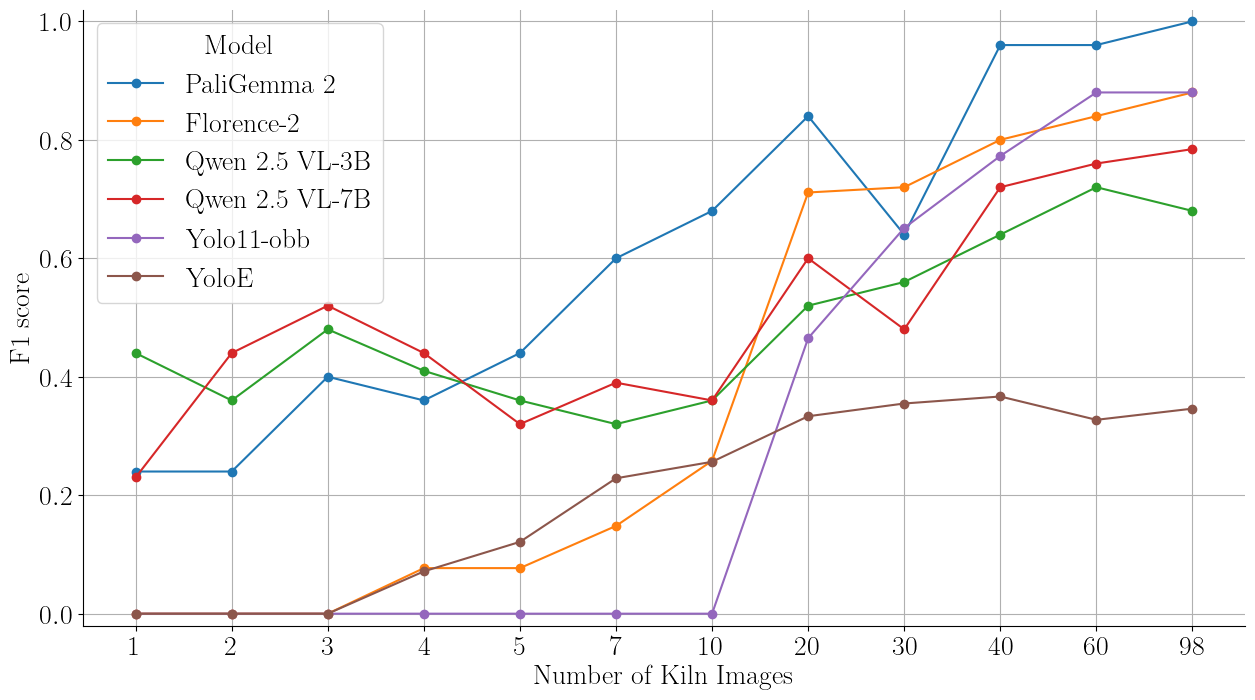

In [17]:
%matplotlib inline
# latexify(15,8,22) # powerpoint
latexify(15,8,20) # paper
fig, ax =plt.subplots()
ax.plot(df.loc[df['Model'] == 'google/paligemma2-3b-pt-448','kiln_images'], df.loc[df['Model'] == 'google/paligemma2-3b-pt-448','F1 score'], marker='o', label = 'PaliGemma 2')
ax.plot(df.loc[df['Model'] == 'microsoft/Florence-2-large-ft','kiln_images'], df.loc[df['Model'] == 'microsoft/Florence-2-large-ft','F1 score'], marker='o', label = 'Florence-2')
ax.plot(df.loc[df['Model'] == 'Qwen/Qwen2.5-VL-3B-Instruct','kiln_images'], df.loc[df['Model'] == 'Qwen/Qwen2.5-VL-3B-Instruct','F1 score'], marker='o', label = 'Qwen 2.5 VL-3B')
ax.plot(df.loc[df['Model'] == 'Qwen/Qwen2.5-VL-7B-Instruct','kiln_images'], df.loc[df['Model'] == 'Qwen/Qwen2.5-VL-7B-Instruct','F1 score'], marker='o', label = 'Qwen 2.5 VL-7B')
ax.plot(df.loc[df['Model'] == 'yolo11-obb','kiln_images'], df.loc[df['Model'] == 'yolo11-obb','F1 score'], marker='o', label = 'Yolo11-obb')
ax.plot(df.loc[df['Model'] == 'yoloe','kiln_images'], df.loc[df['Model'] == 'yoloe','F1 score'], marker='o', label = 'YoloE')


ax.set_xlabel('Number of Kiln Images')
ax.set_ylabel('F1 score')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
ax.set_ylim(-0.02,1.02)
# ax.set_ylim(-0.02, 0.6)
ax.legend(title='Model', loc = 'upper left')
fig.savefig(f'F1_score_vs_kiln_images_train_{train_region}_test_{test_region}.png', dpi=300, bbox_inches='tight')

#### Precision and recall plots when trained on Lucknow region and tested on Lucknow region with background images

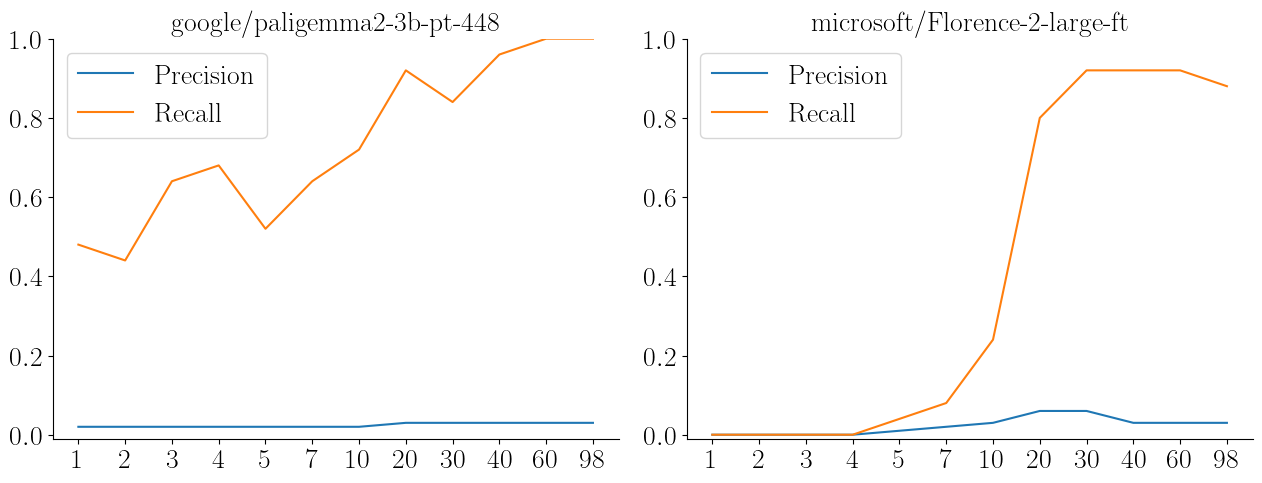

In [11]:
%matplotlib inline
latexify(15,5,20)
fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax = ax.flatten()
models = ['google/paligemma2-3b-pt-448', 'microsoft/Florence-2-large-ft', 'Qwen/Qwen2.5-VL-3B-Instruct', 'Qwen/Qwen2.5-VL-7B-Instruct', 'yolo11-obb', 'yoloe']
for i, model in enumerate(models[:2]):
    model_df = df[df['Model'] == model]
    ax[i].plot(model_df['kiln_images'], model_df['Precision'], label = 'Precision')
    ax[i].plot(model_df['kiln_images'], model_df['Recall'], label = 'Recall')
    ax[i].legend(loc = 'upper left')
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_title(model)
    ax[i].set_ylim(-0.01,1)

plt.subplots_adjust(left=0.1, right=0.9, 
                    top=0.9, bottom=0.1, 
                    wspace=0.12, hspace=0.2)

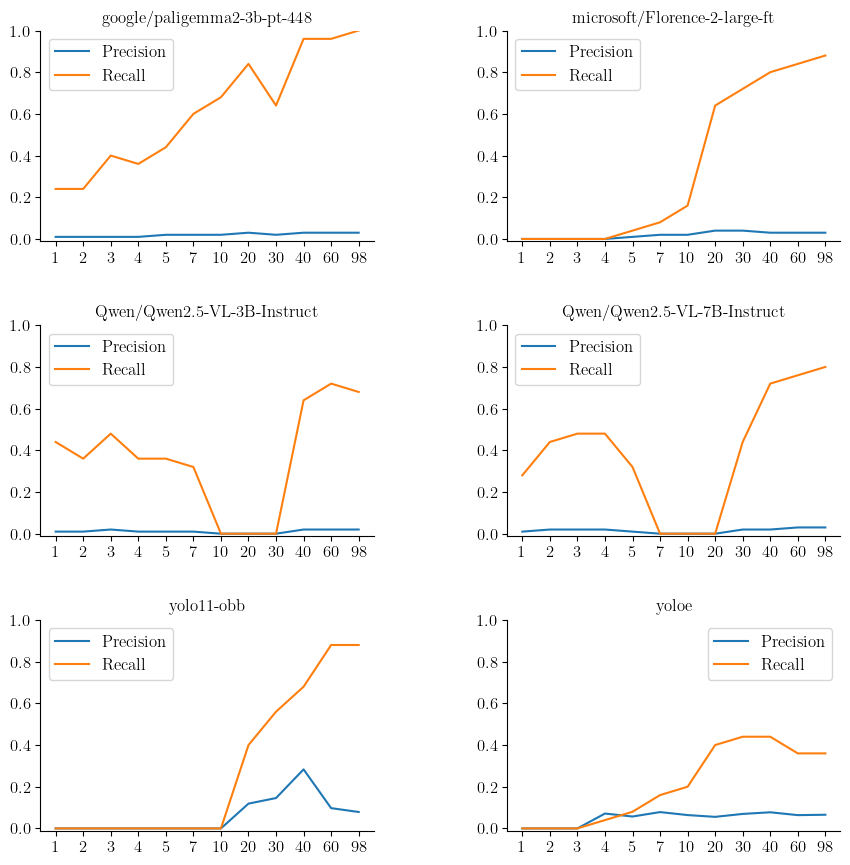

In [18]:
latexify(10,10,12)
fig, ax = plt.subplots(nrows = 3, ncols = 2)
ax = ax.flatten()
models = ['google/paligemma2-3b-pt-448', 'microsoft/Florence-2-large-ft', 'Qwen/Qwen2.5-VL-3B-Instruct', 'Qwen/Qwen2.5-VL-7B-Instruct', 'yolo11-obb', 'yoloe']
for i, model in enumerate(models):
    model_df = df[df['Model'] == model]
    ax[i].plot(model_df['kiln_images'], model_df['Precision'], label = 'Precision')
    ax[i].plot(model_df['kiln_images'], model_df['Recall'], label = 'Recall')
    ax[i].legend()
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_title(model)
    ax[i].set_ylim(-0.01,1)

plt.subplots_adjust(left=0.1, right=0.9, 
                    top=0.9, bottom=0.1, 
                    wspace=0.4, hspace=0.4)

fig.savefig('PvsR_train_lucknow_test_lucknow_with_background_images.png', dpi=300, bbox_inches='tight')